<b>
    <h1 align="center" style="color:red">Linear Regression</h1>
</b>

In [56]:
# Import libraries to help the process
import numpy as np
import matplotlib.pyplot as plt

# Import the Linear regression module from scikit-learn library
from sklearn.linear_model import LinearRegression

In [57]:
# Reset the random to generate always the same evalues
np.random.seed(1234)

In [58]:
# Generate input/output (features/labels) values
N = 100   # Number of observations done

# True function
x = 2.0 * np.random.rand(N, 1) # Generate values between 0 and 2 (That's why 2.0 is used in multiplication)
y = 4.0 + 3.0 * x

# Function with noisy (Observable function)
y_noisy = y + np.random.randn(N,1)

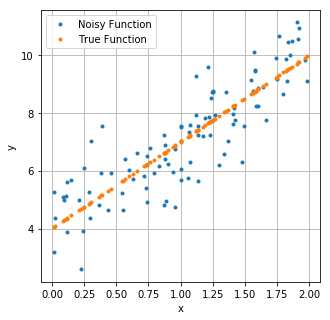

In [59]:
# Plot pair example/label for each function
plt.figure(figsize=(5,5))
plt.plot(x, y_noisy, '.', label = "Noisy Function")
plt.plot(x, y, '.', label = "True Function")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

<b>
    <h2 align="center" style="color:red">Manual Solution</h2>
</b>

In [60]:
# Join two vector vector to add x0 element
X_b = np.c_[np.ones((N, 1)), x]

# Solve by applying the Least-Squares method
a_optimum = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_noisy)

# In this case, we will have two coefficients as solution to this problem
print(a_optimum.shape)

# Printing values of coefficients (best solution for 100 observations (N))
print('a0: %.4f' % (a_optimum[0][0]))
print('a1: %.4f' % (a_optimum[1][0]))

(2, 1)
a0: 4.0763
a1: 2.9413


<b>
    <h3>Mean Squared Error</h3>
</b>

In [61]:
# Calculating ŷ values based on estimated model, multiplying attributes matrix by the coefficients
yhat = X_b.dot(a_optimum)

# Calculating the mean-squared error
Je_optimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Showing the minimum MSE value
print('MSE: %.4f' % (Je_optimum))

MSE: 0.9273


<b>
    <h2 align="center" style="color:red">Scikit-learn's Solution</h2>
</b>

In [62]:
# Linear Regression instantiate
lin_reg = LinearRegression()

# Training the model
# The fit method already add the linear bias column (a0)
lin_reg.fit(x, y_noisy)

# Printing values of coefficients
print('a0: %.4f' % (lin_reg.intercept_[0]))
print('a1: %.4f' % (lin_reg.coef_[0][0]))

a0: 4.0763
a1: 2.9413


In [63]:
# myModel function
def myModel(x):
    return x*slope + intercept

In [64]:
# Getting the coeficients
slope = lin_reg.coef_[0][0]
intercept = lin_reg.intercept_[0]

a_sklearn = np.zeros((2,1))
a_sklearn[0][0] = intercept
a_sklearn[1][0] = slope

In [65]:
# Calculating ŷ values based on estimated model, multiplying attributes matrix by the coefficients
yhat = X_b.dot(a_sklearn)

# Calculating the mean-squared error
Je_sklearn = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Showing the minimum MSE value
print('MSE: %.4f' % (Je_sklearn))

MSE: 0.9273


In [66]:
# Getting predict values
myModel = myModel(x)

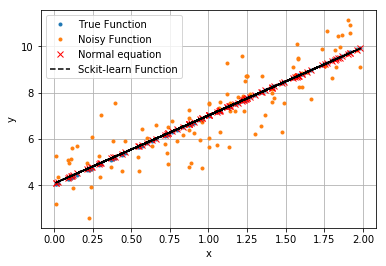

In [67]:
# Plot pair myModel and true function
plt.plot(x, y, '.', label = "True Function")
plt.plot(x, y_noisy, '.', label = "Noisy Function")
plt.plot(x, X_b.dot(a_optimum), 'rx', label = "Normal equation")
plt.plot(x, X_b.dot(a_sklearn), 'k--', label = "Sckit-learn Function")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()